# Unsupervised learning-1
21 Aug 2020

By Dr. Maryam Rahbaralam

Watch the video of this session on my Youtube channel, dont forget to subscribe to see the following videos!

https://youtu.be/fqssd7g-mtY 
1. K-Means Clustering
2. Elbow Method
3. SpectralClustering estimator
4. MiniBatchKMeans
5. k-means for color compression¶



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

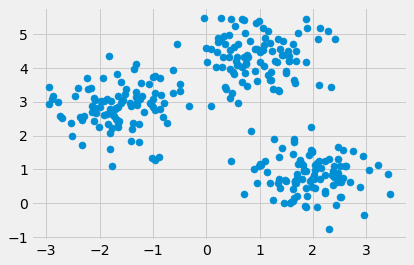

In [118]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [129]:
#make_blobs()
#X
#X[:, 0]
#X[:, 1]

In [110]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(features)

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=3,
    random_state=42
)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [142]:
#KMeans()

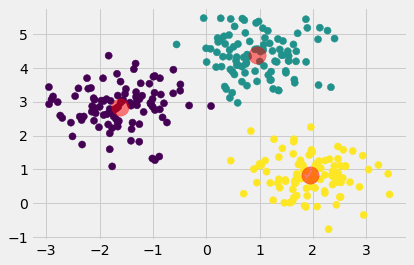

In [143]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

In [130]:
kmeans.cluster_centers_

array([[-1.60811992,  2.85881658],
       [ 0.95625704,  4.37226546],
       [ 1.95159369,  0.83467497]])

In [131]:
kmeans.cluster_centers_[:, 0]

array([-1.60811992,  0.95625704,  1.95159369])

In [132]:
kmeans.cluster_centers_[:, 1]

array([2.85881658, 4.37226546, 0.83467497])

In [144]:
# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
#kmeans.cluster_centers_

# The number of iterations required to converge
#kmeans.n_iter_

212.35550348922897

## Choosing the Appropriate Number of Clusters


In [97]:
kmeans_kwargs = {
    "init": "random",
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
print(sse)

[1517.0391167760831, 655.3392746547813, 212.35550348922897, 182.81720000297037, 158.1988190077073, 138.39850566859445, 121.55585415553352, 103.96438435873597, 89.40228552411315, 84.26829108813007]


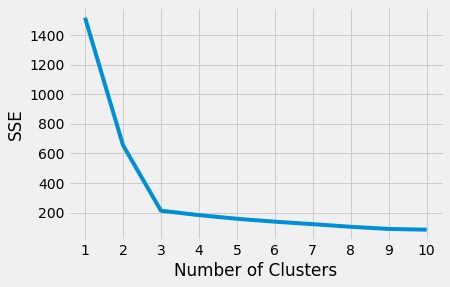

In [98]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

# k-means is limited to linear cluster boundaries

In [145]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

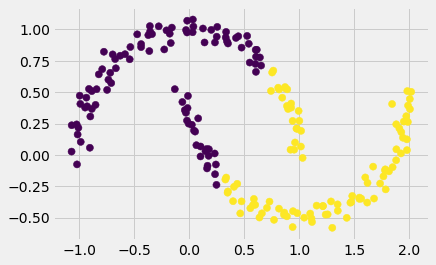

In [53]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

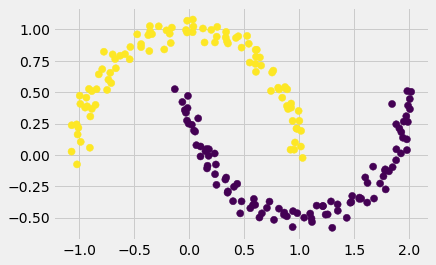

In [146]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Example 2: k-means for color compression

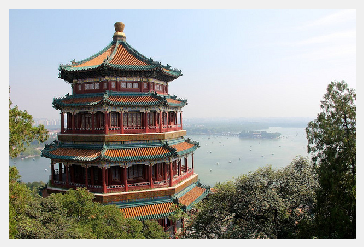

In [55]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [147]:
china.shape

(427, 640, 3)

In [57]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [58]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

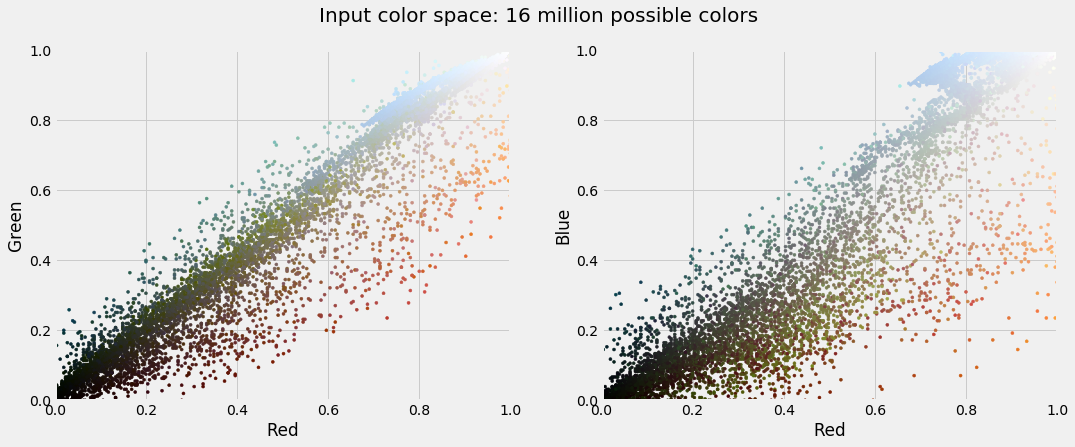

In [59]:
plot_pixels(data, title='Input color space: 16 million possible colors')


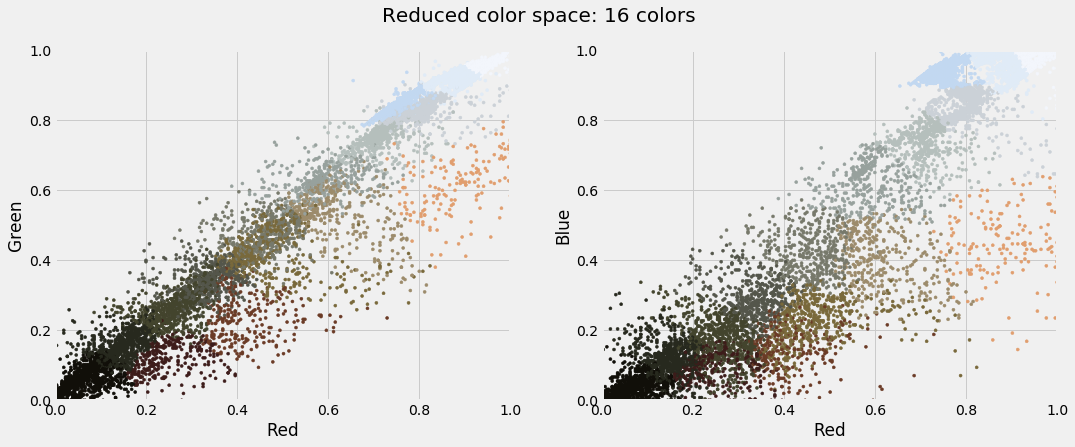

In [60]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

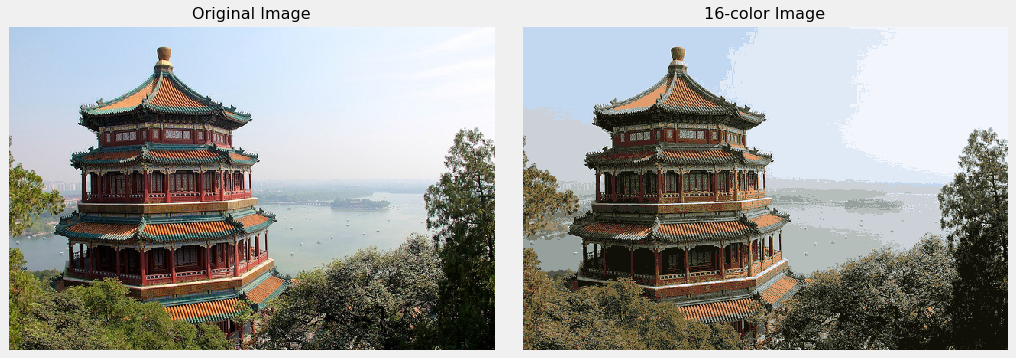

In [148]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
